In [14]:
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
from PIL import Image
from tqdm import tqdm

%matplotlib inline

  0%|          | 0/4 [00:00<?, ?it/s]

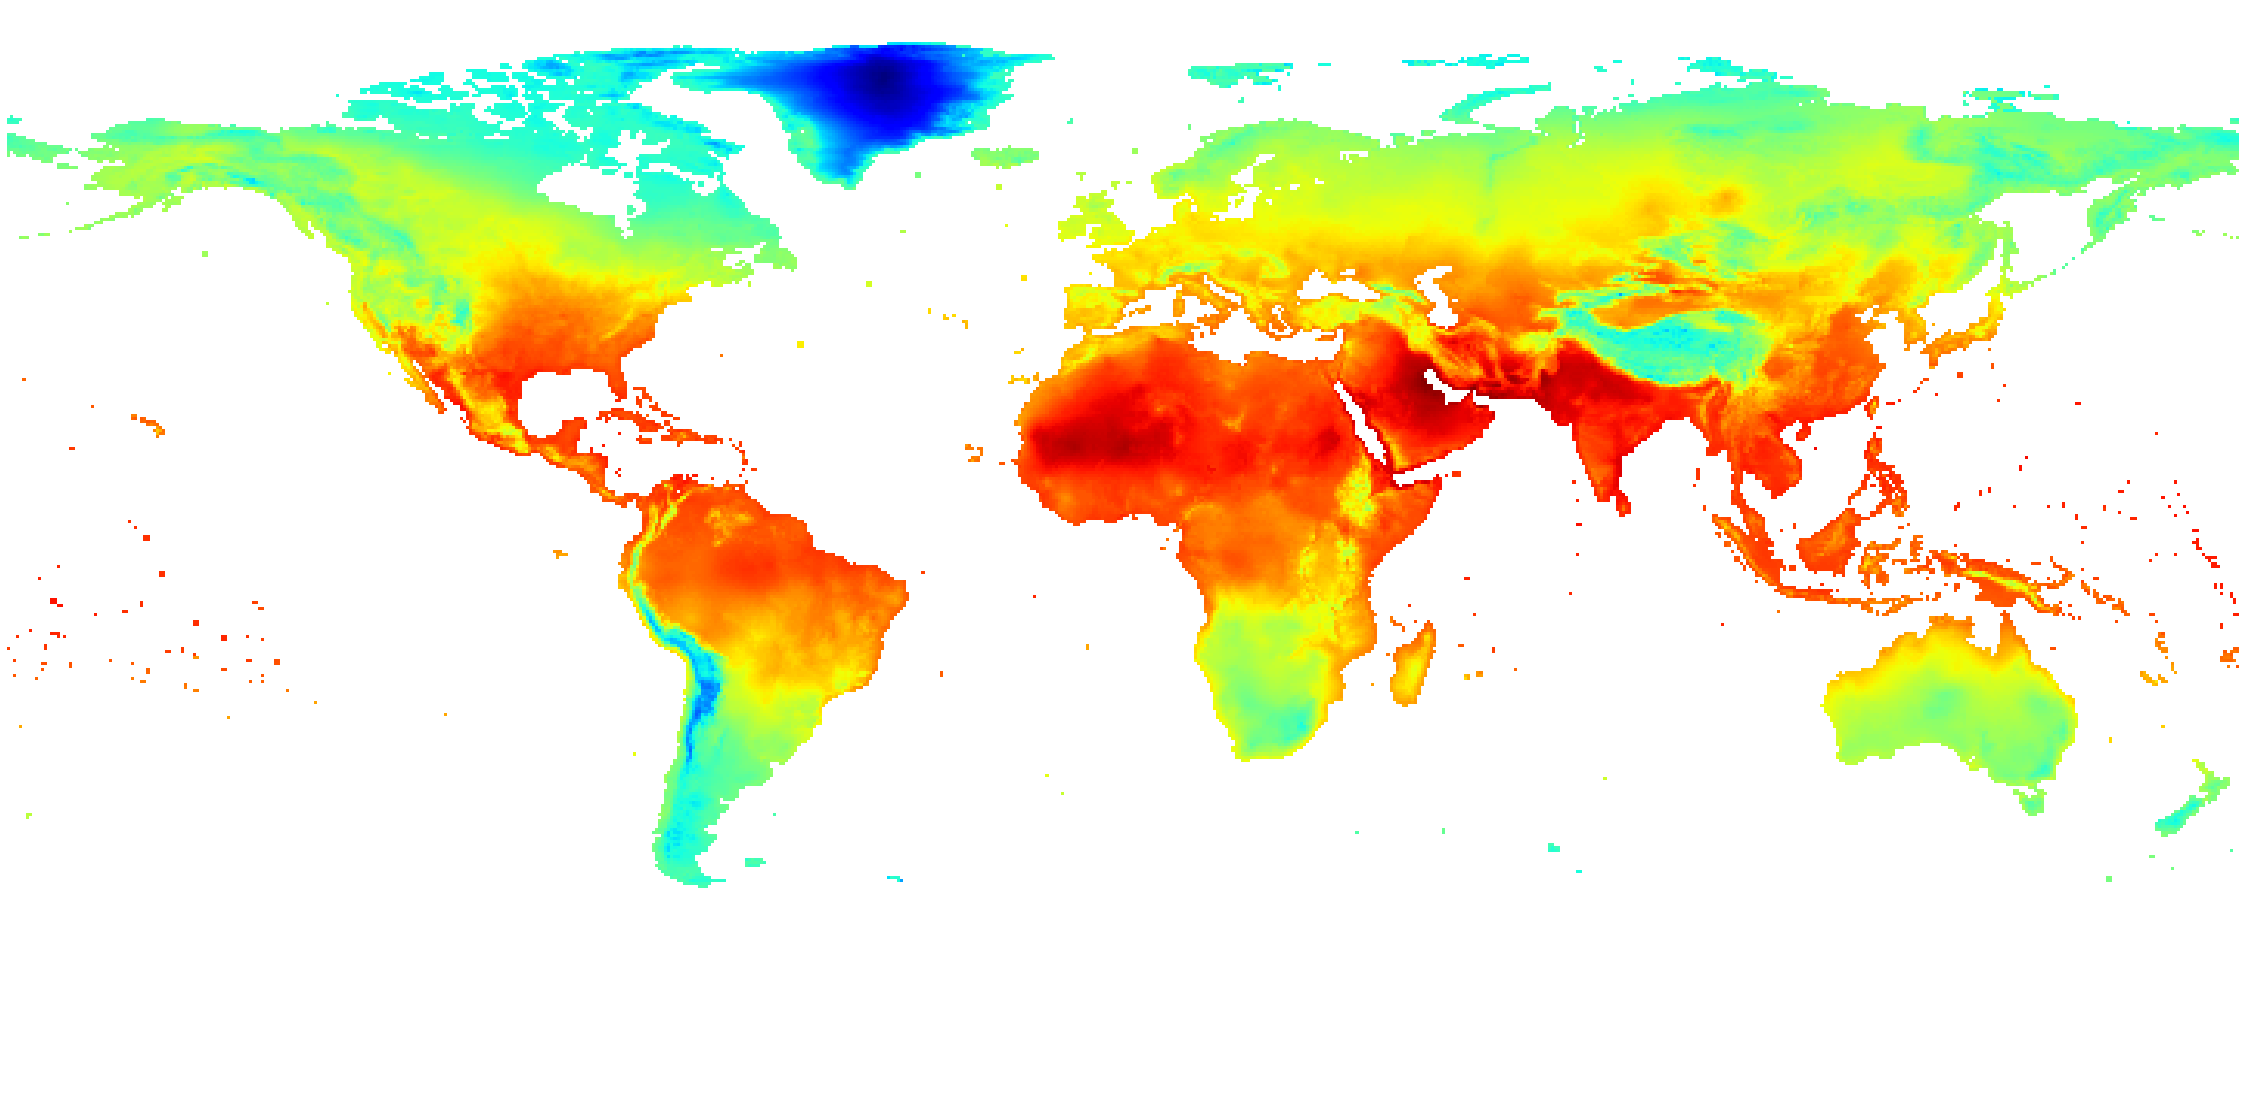

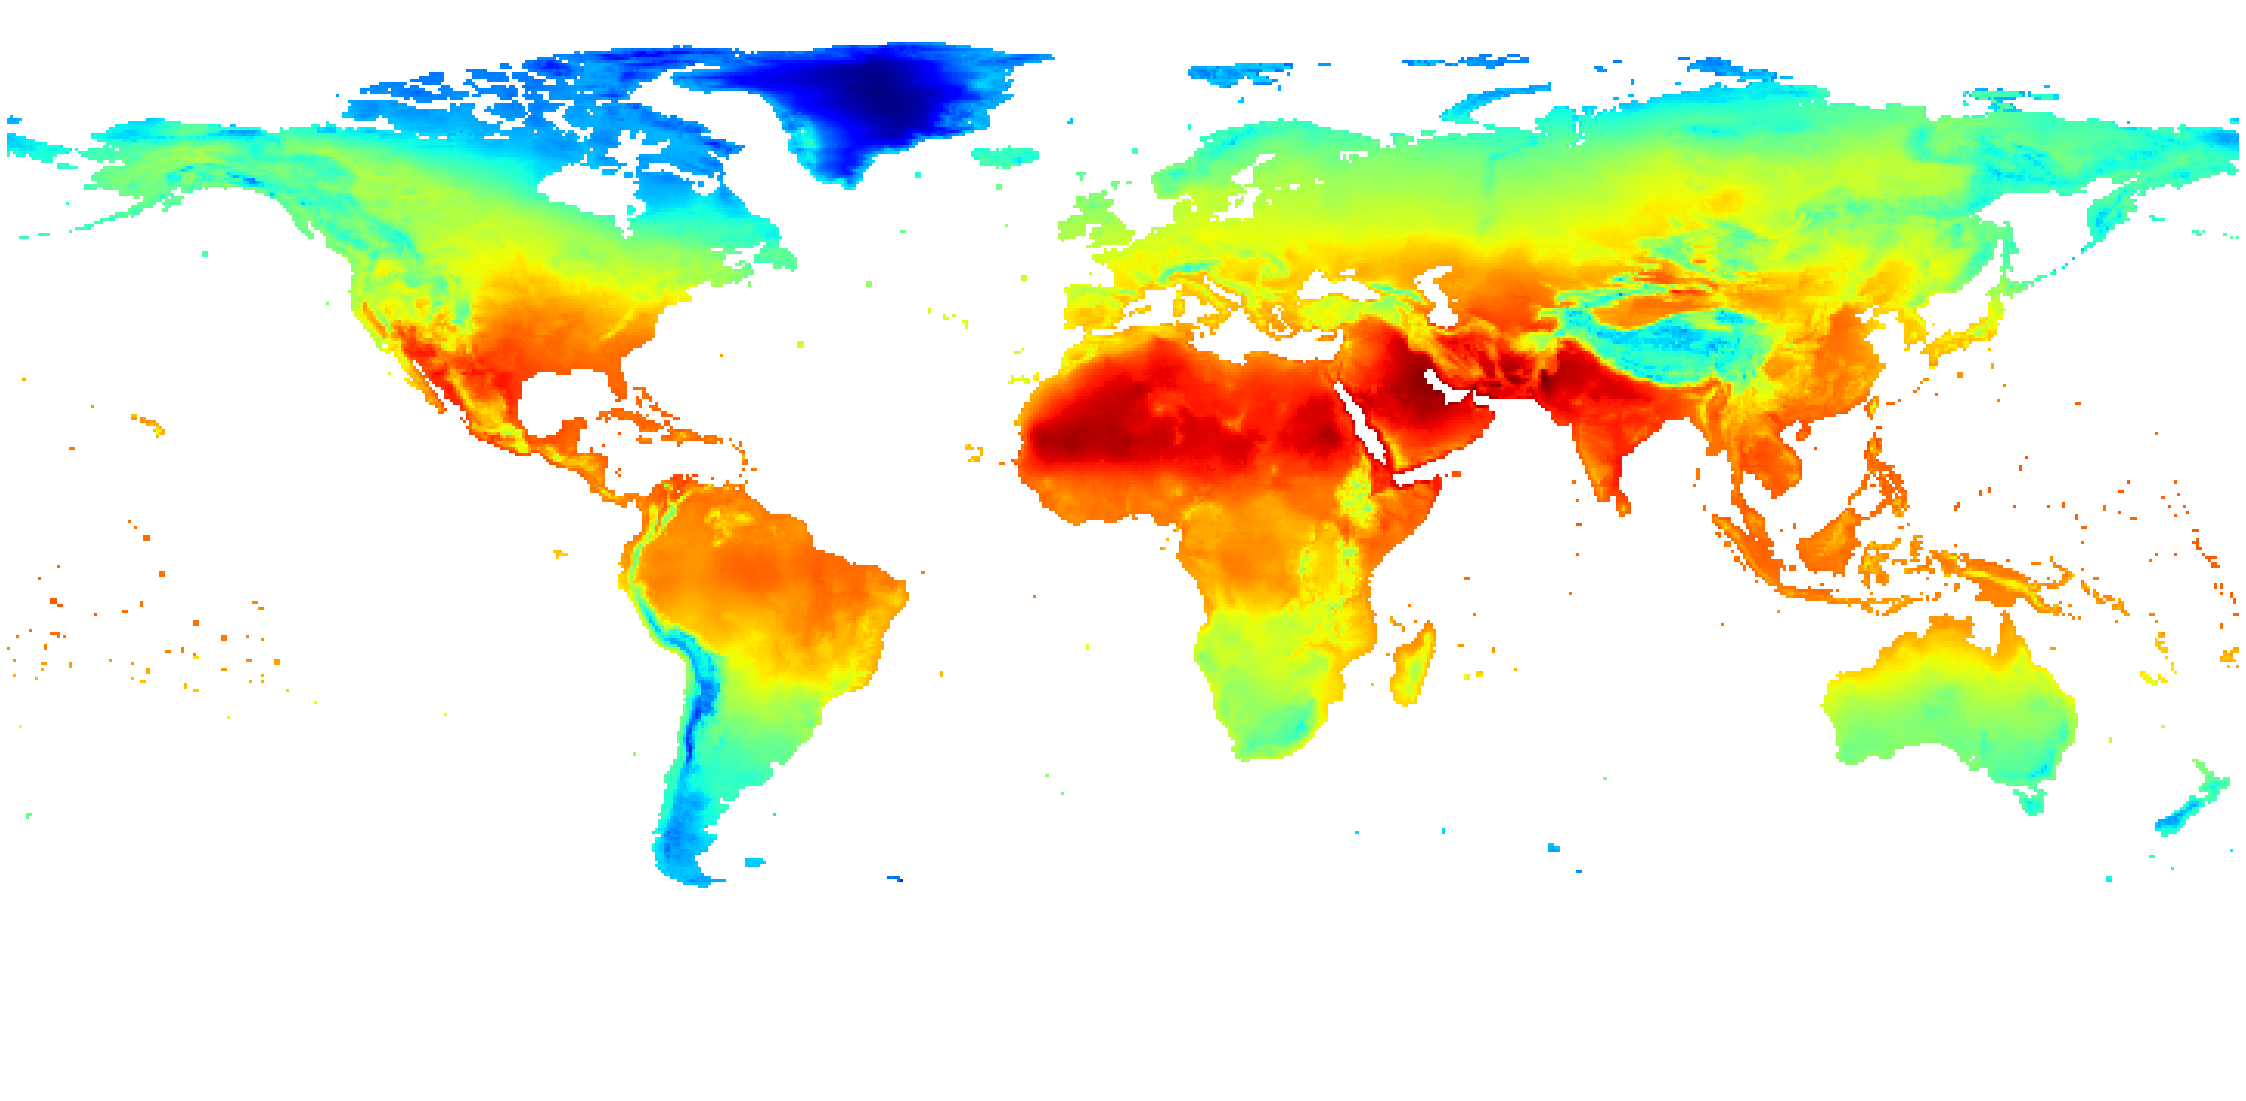

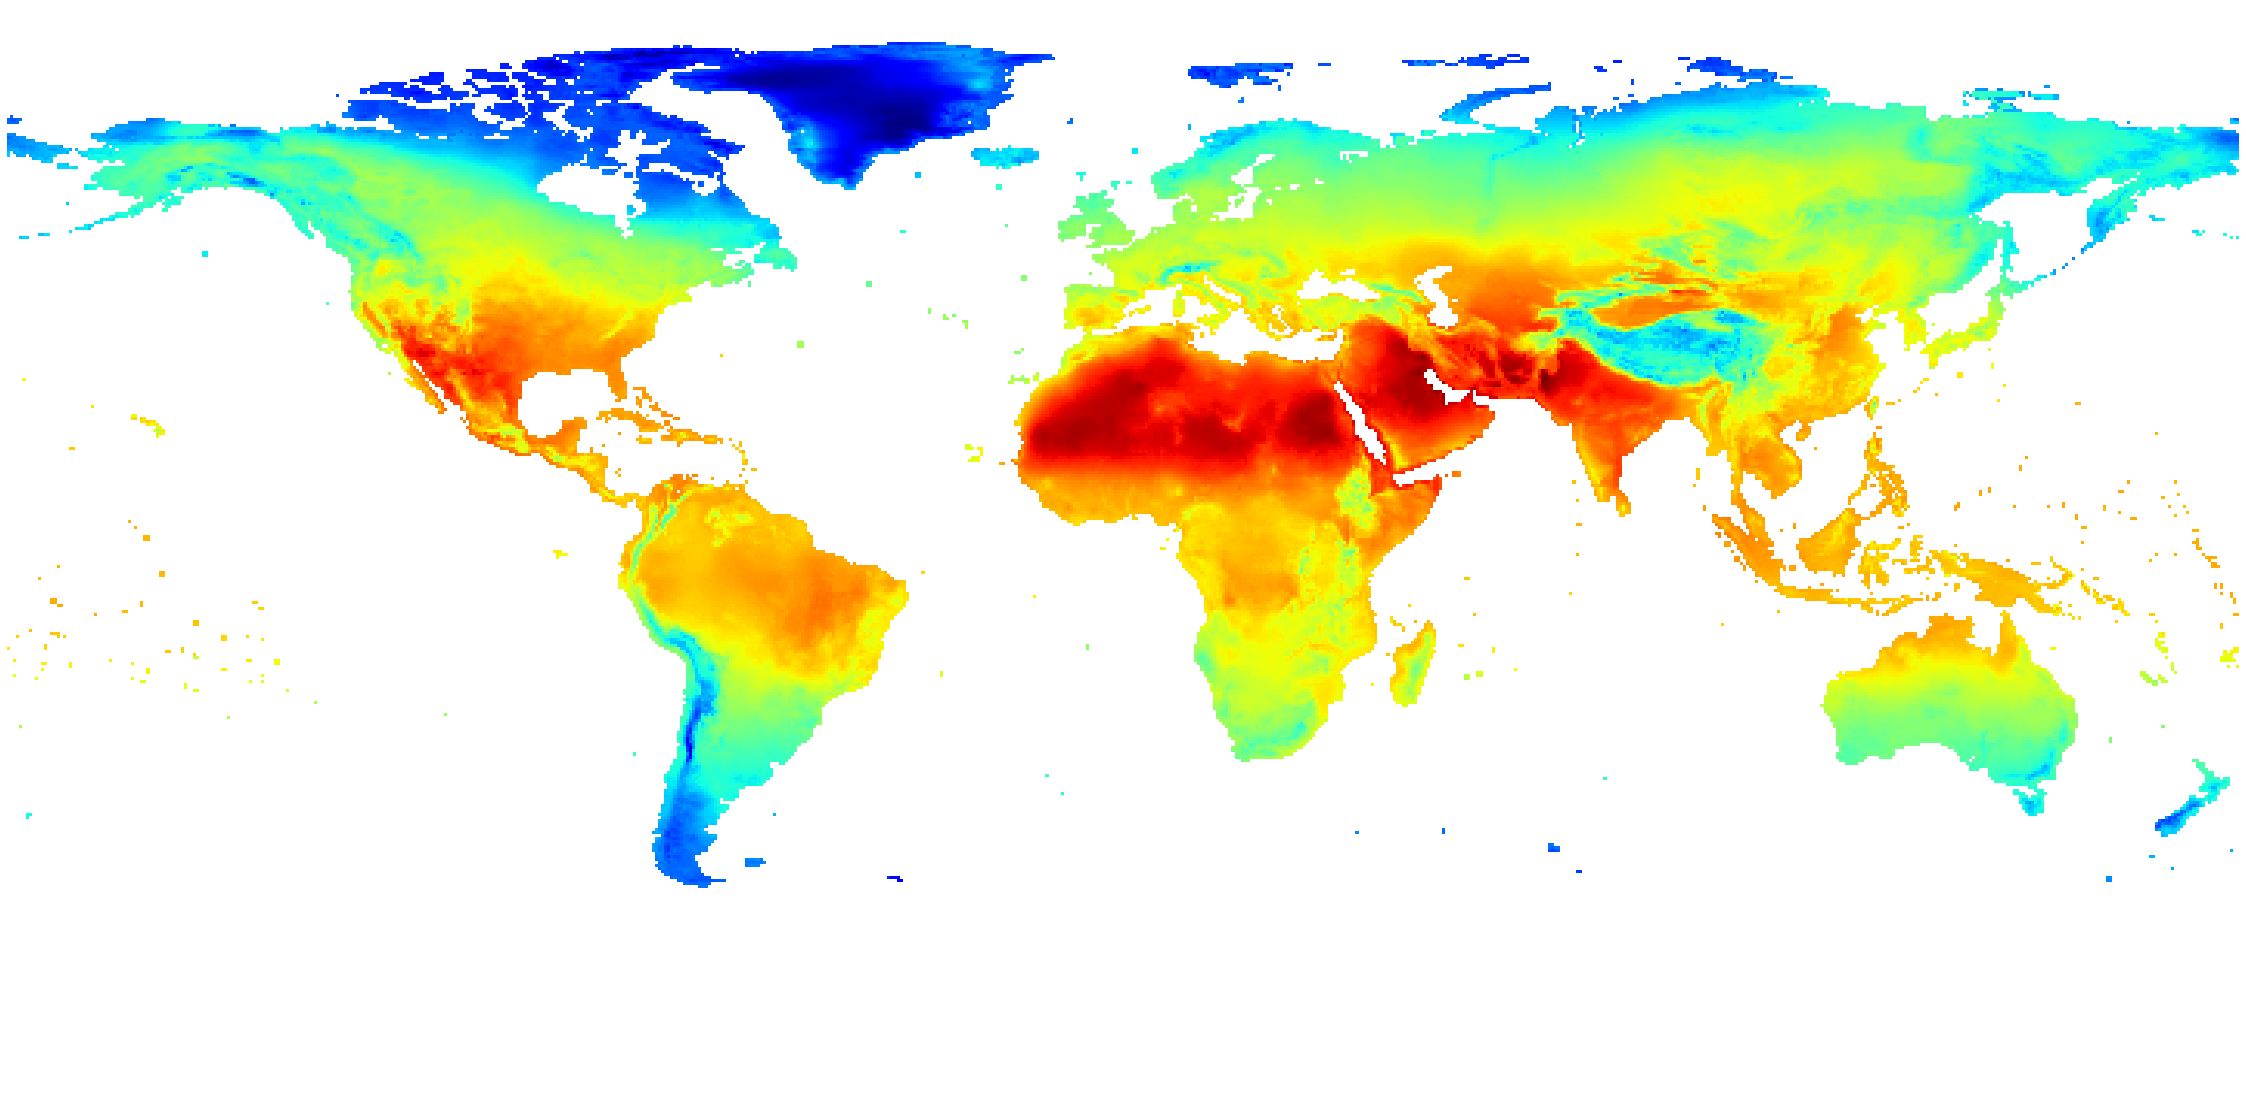

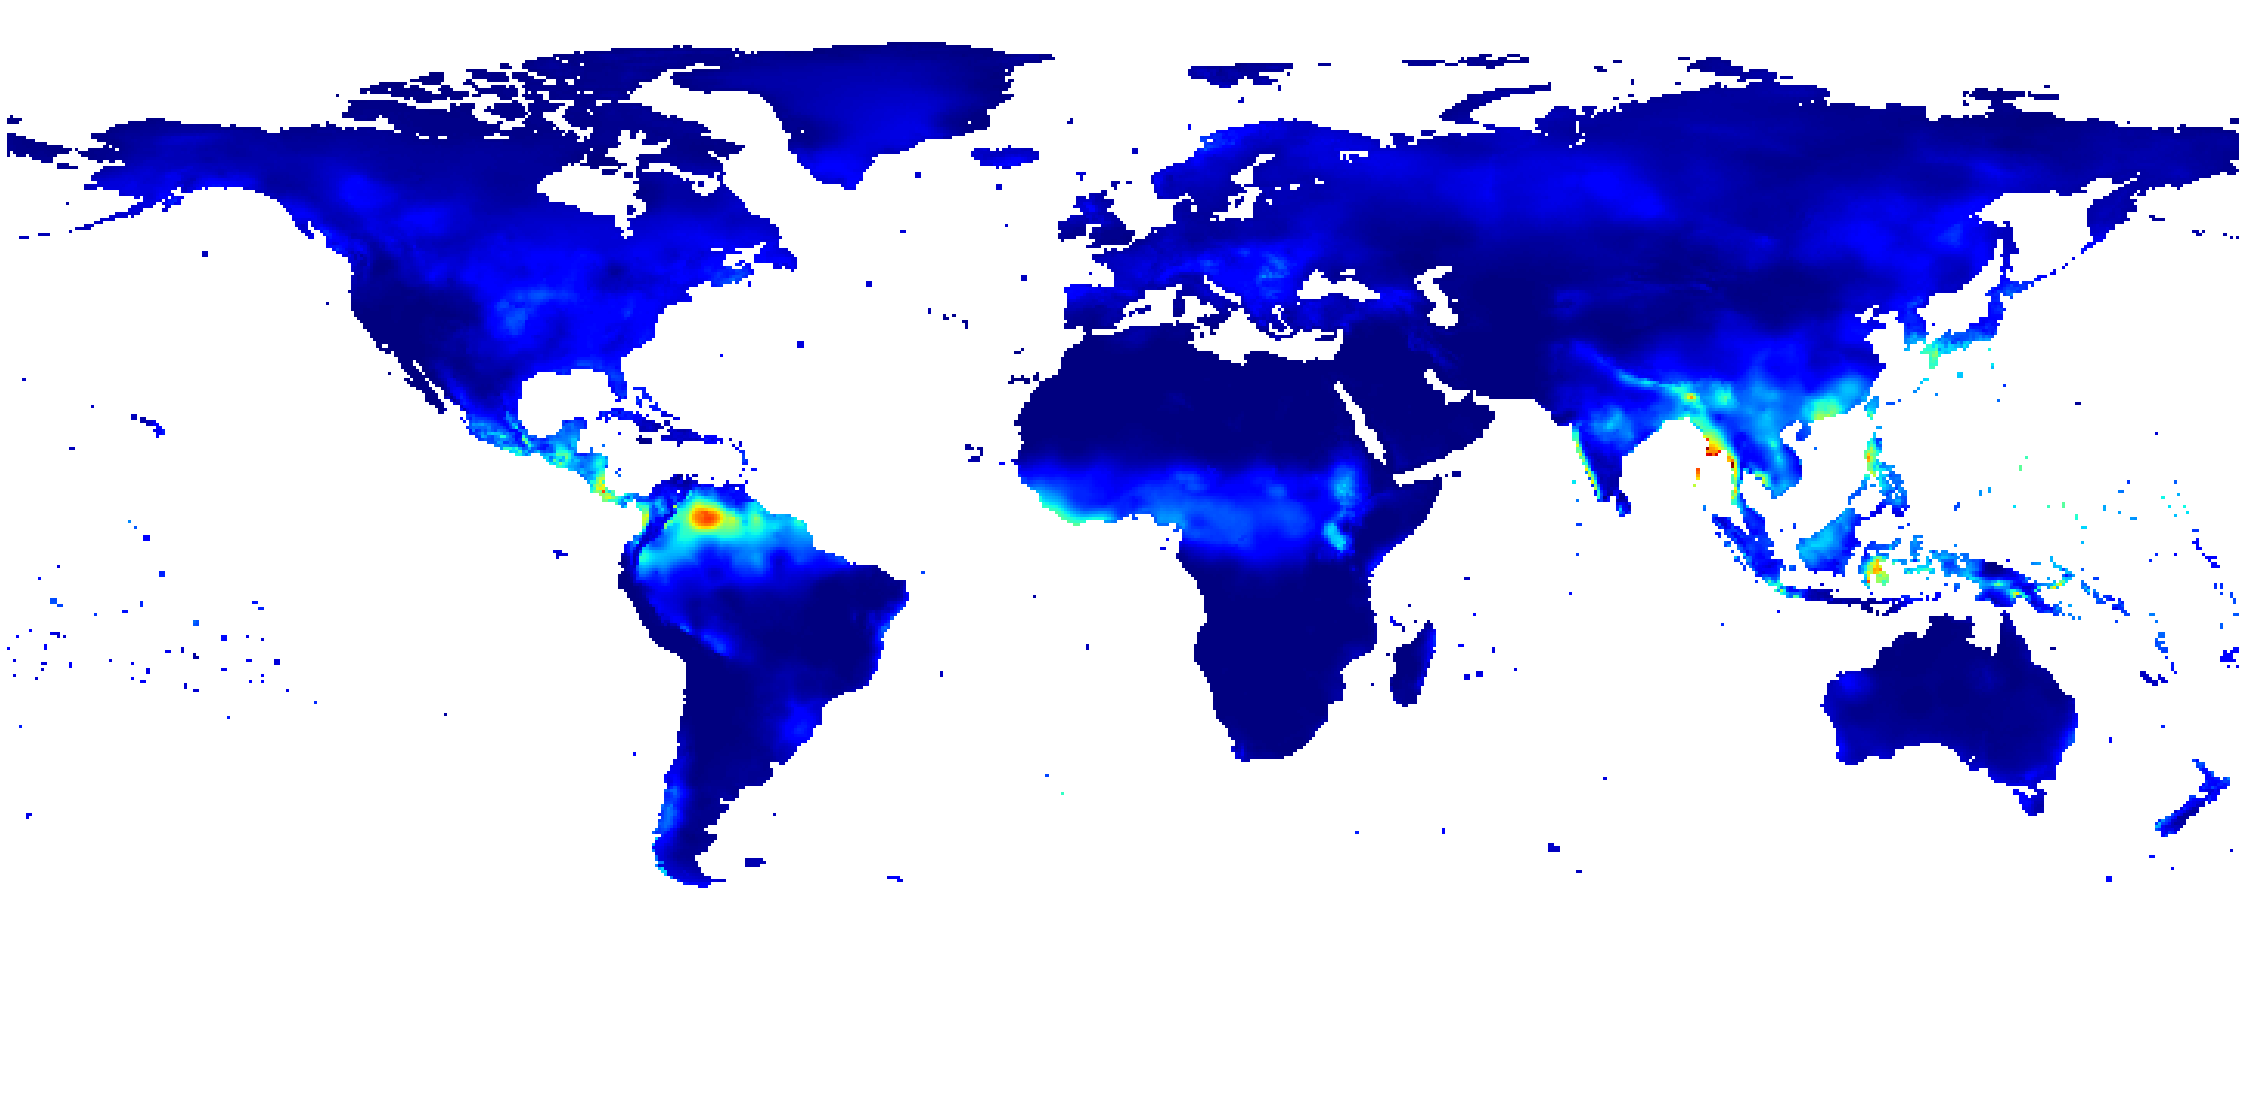

 25%|██▌       | 1/4 [00:03<00:09,  3.05s/it]

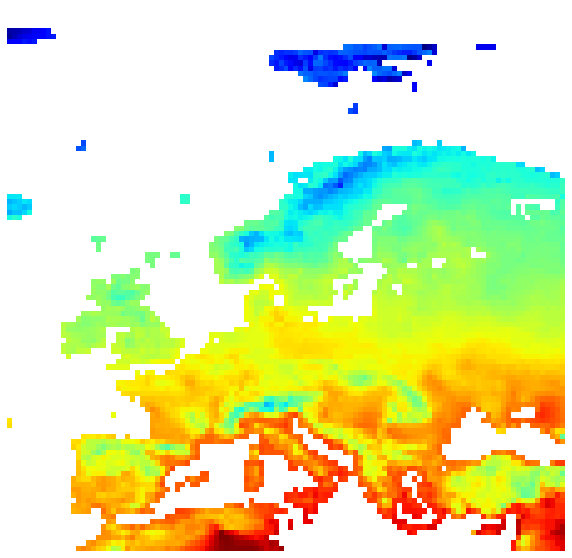

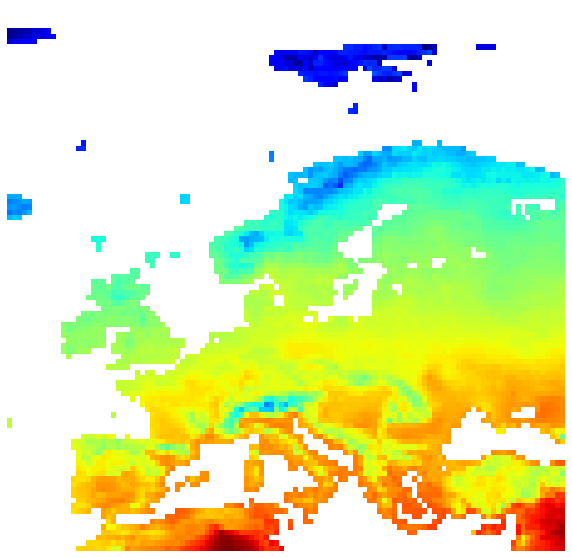

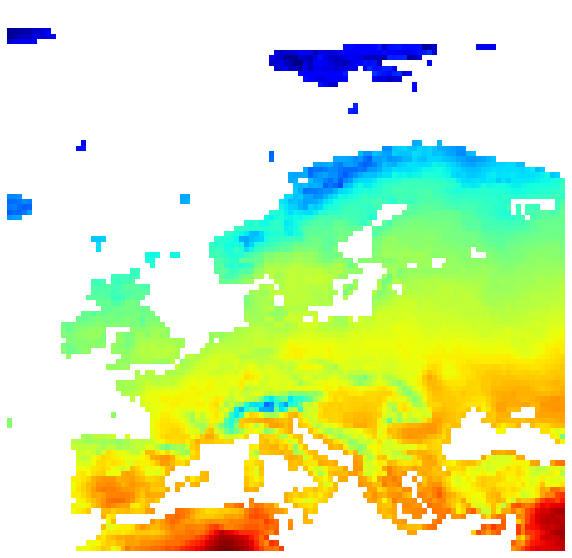

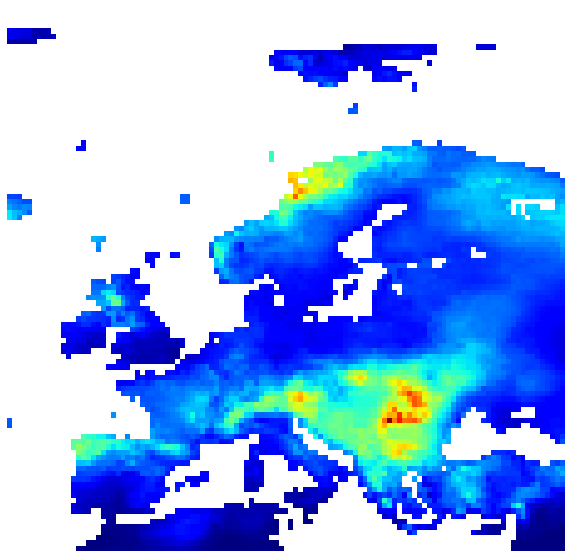

 50%|█████     | 2/4 [00:03<00:03,  1.52s/it]

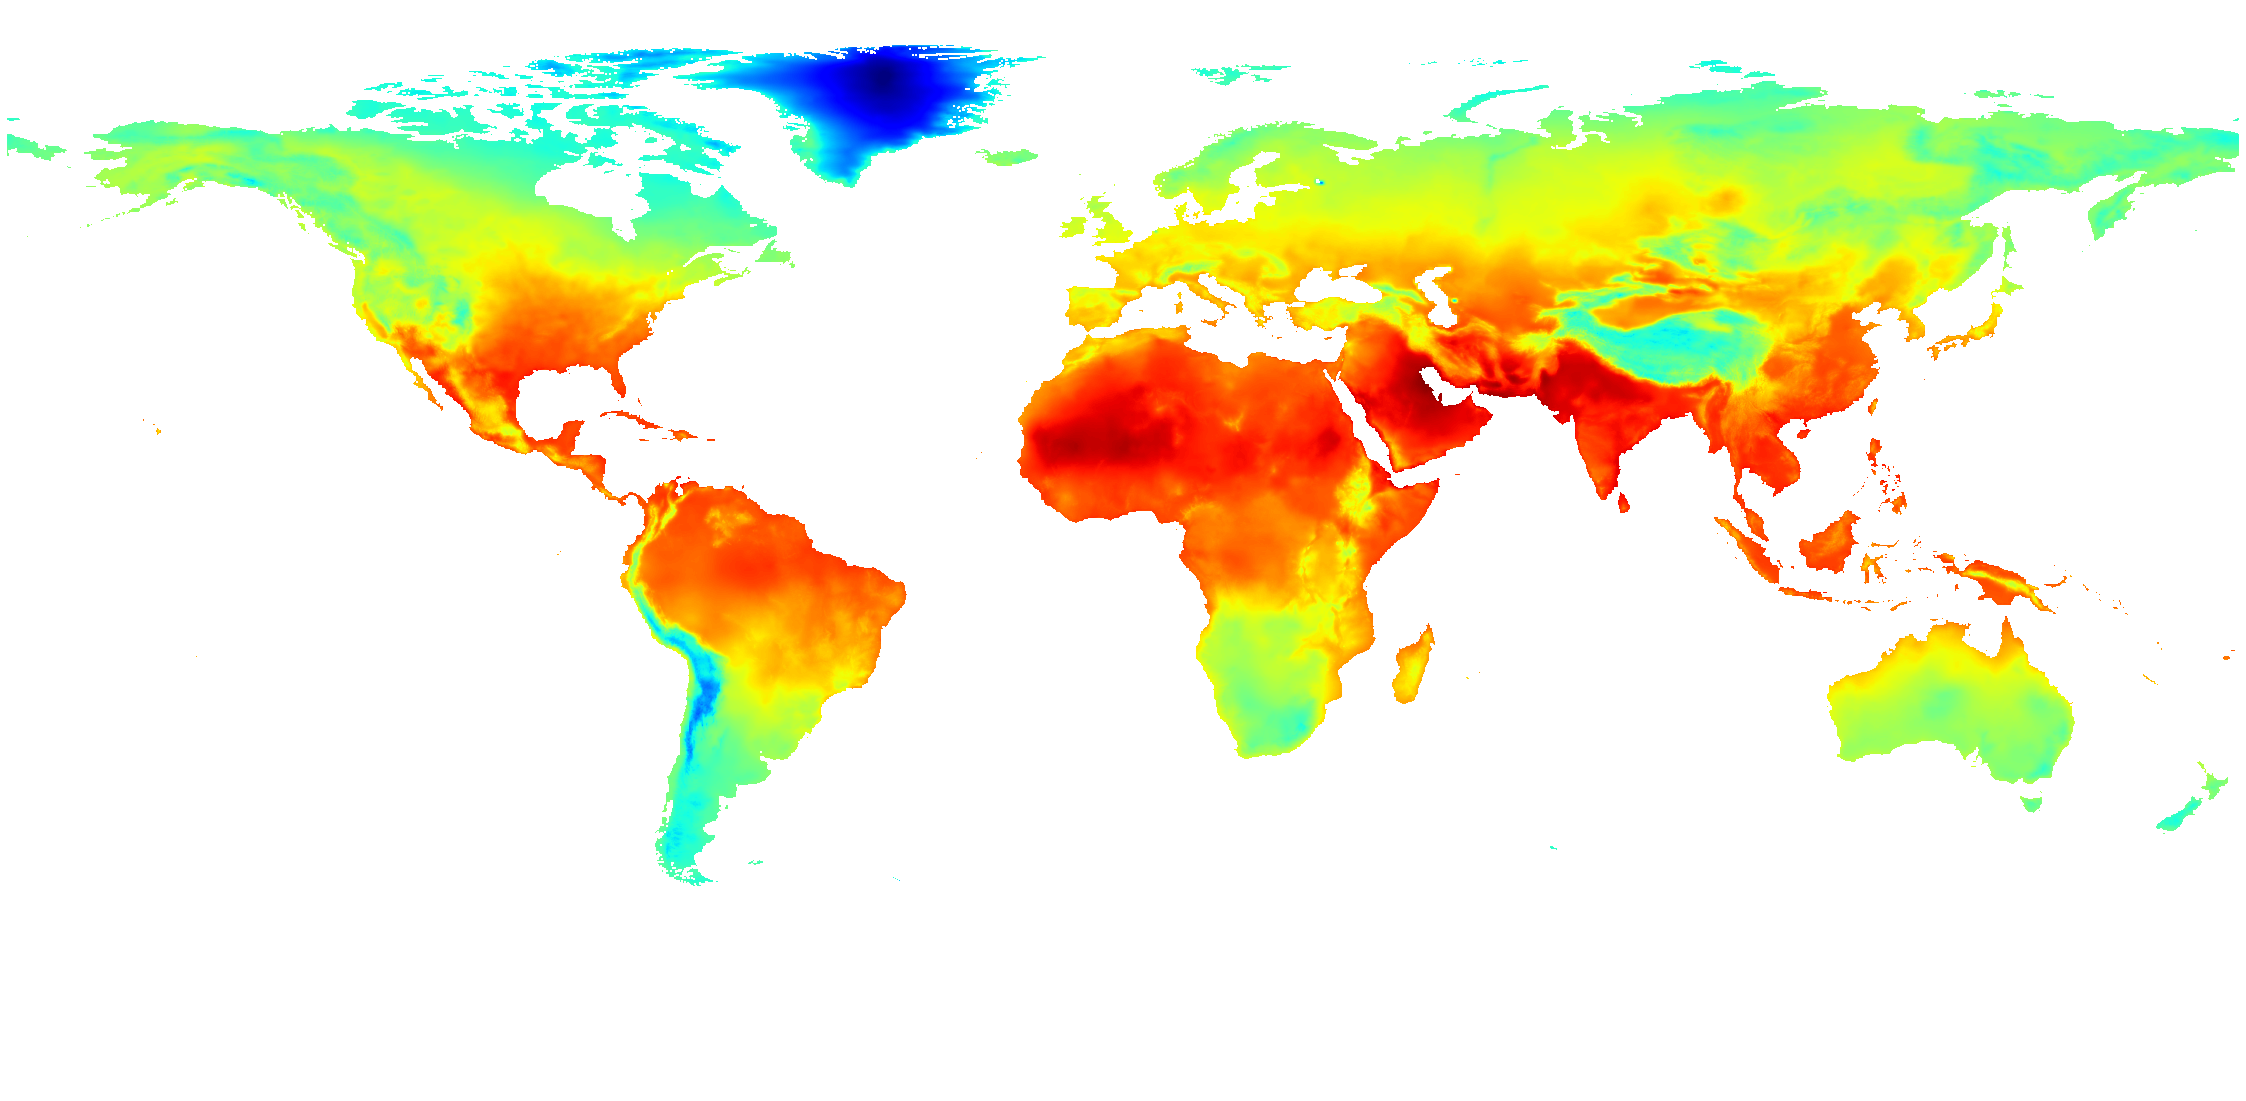

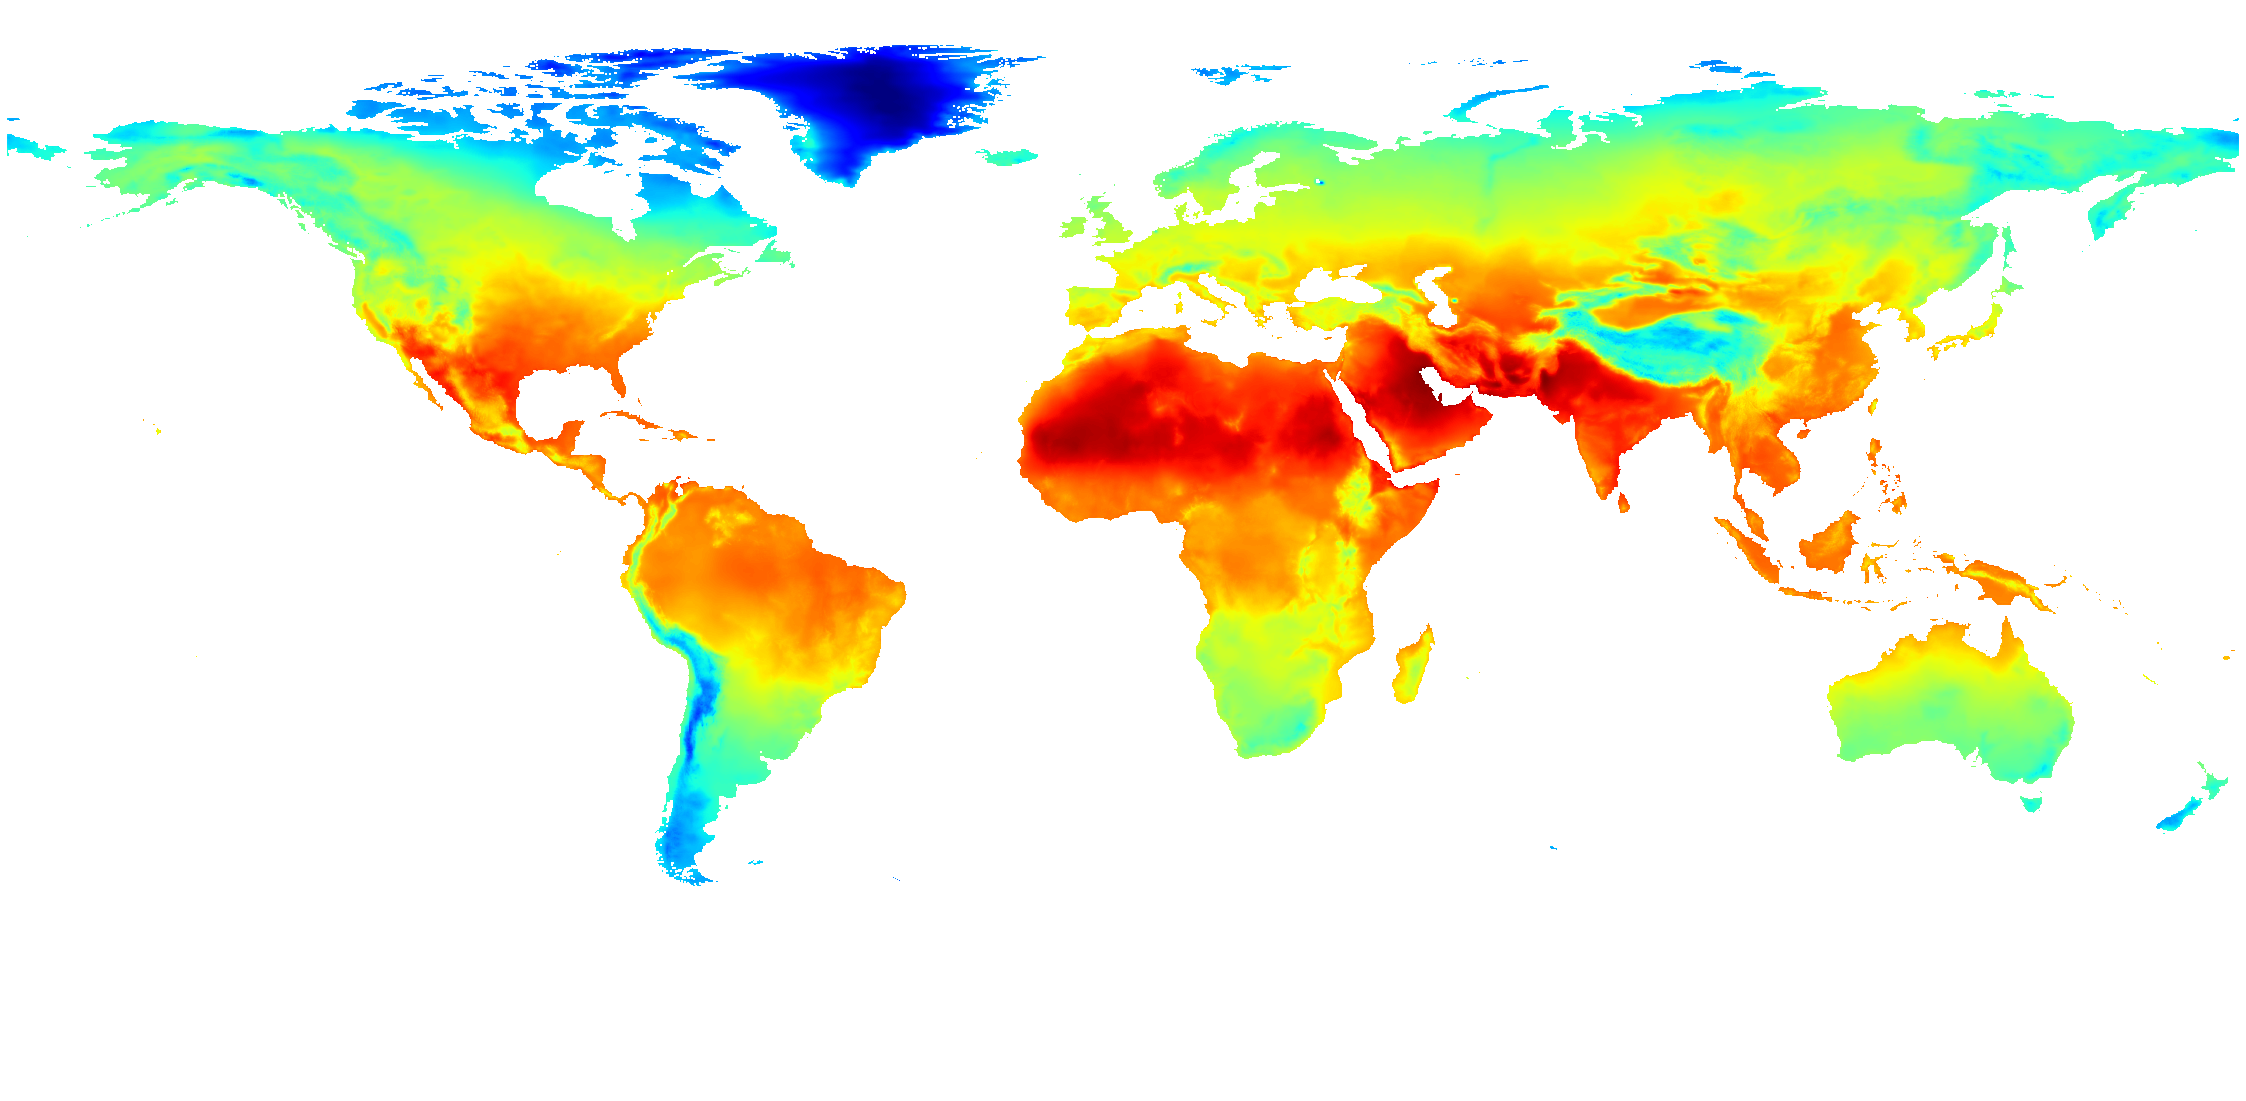

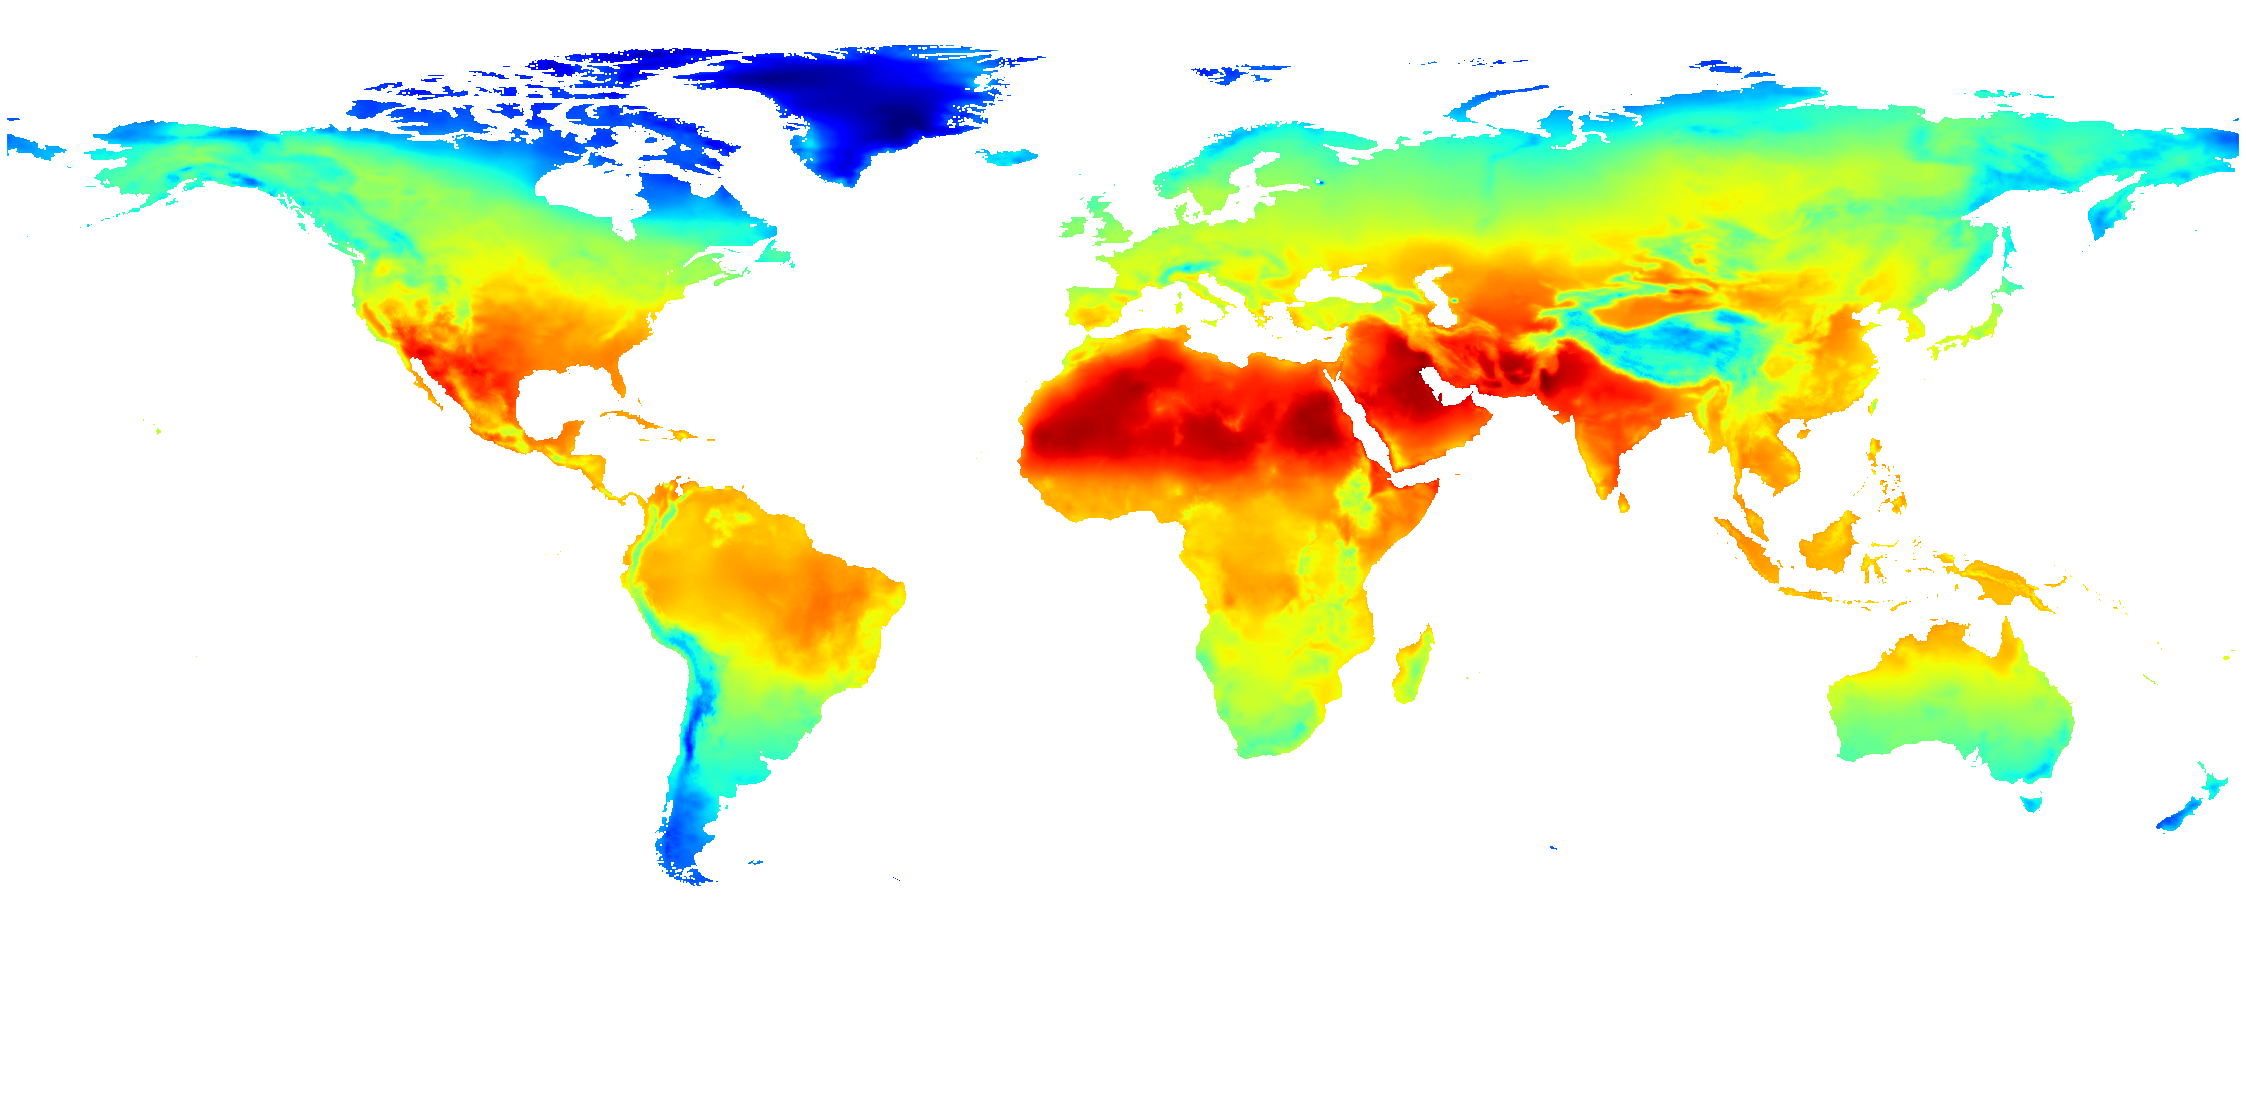

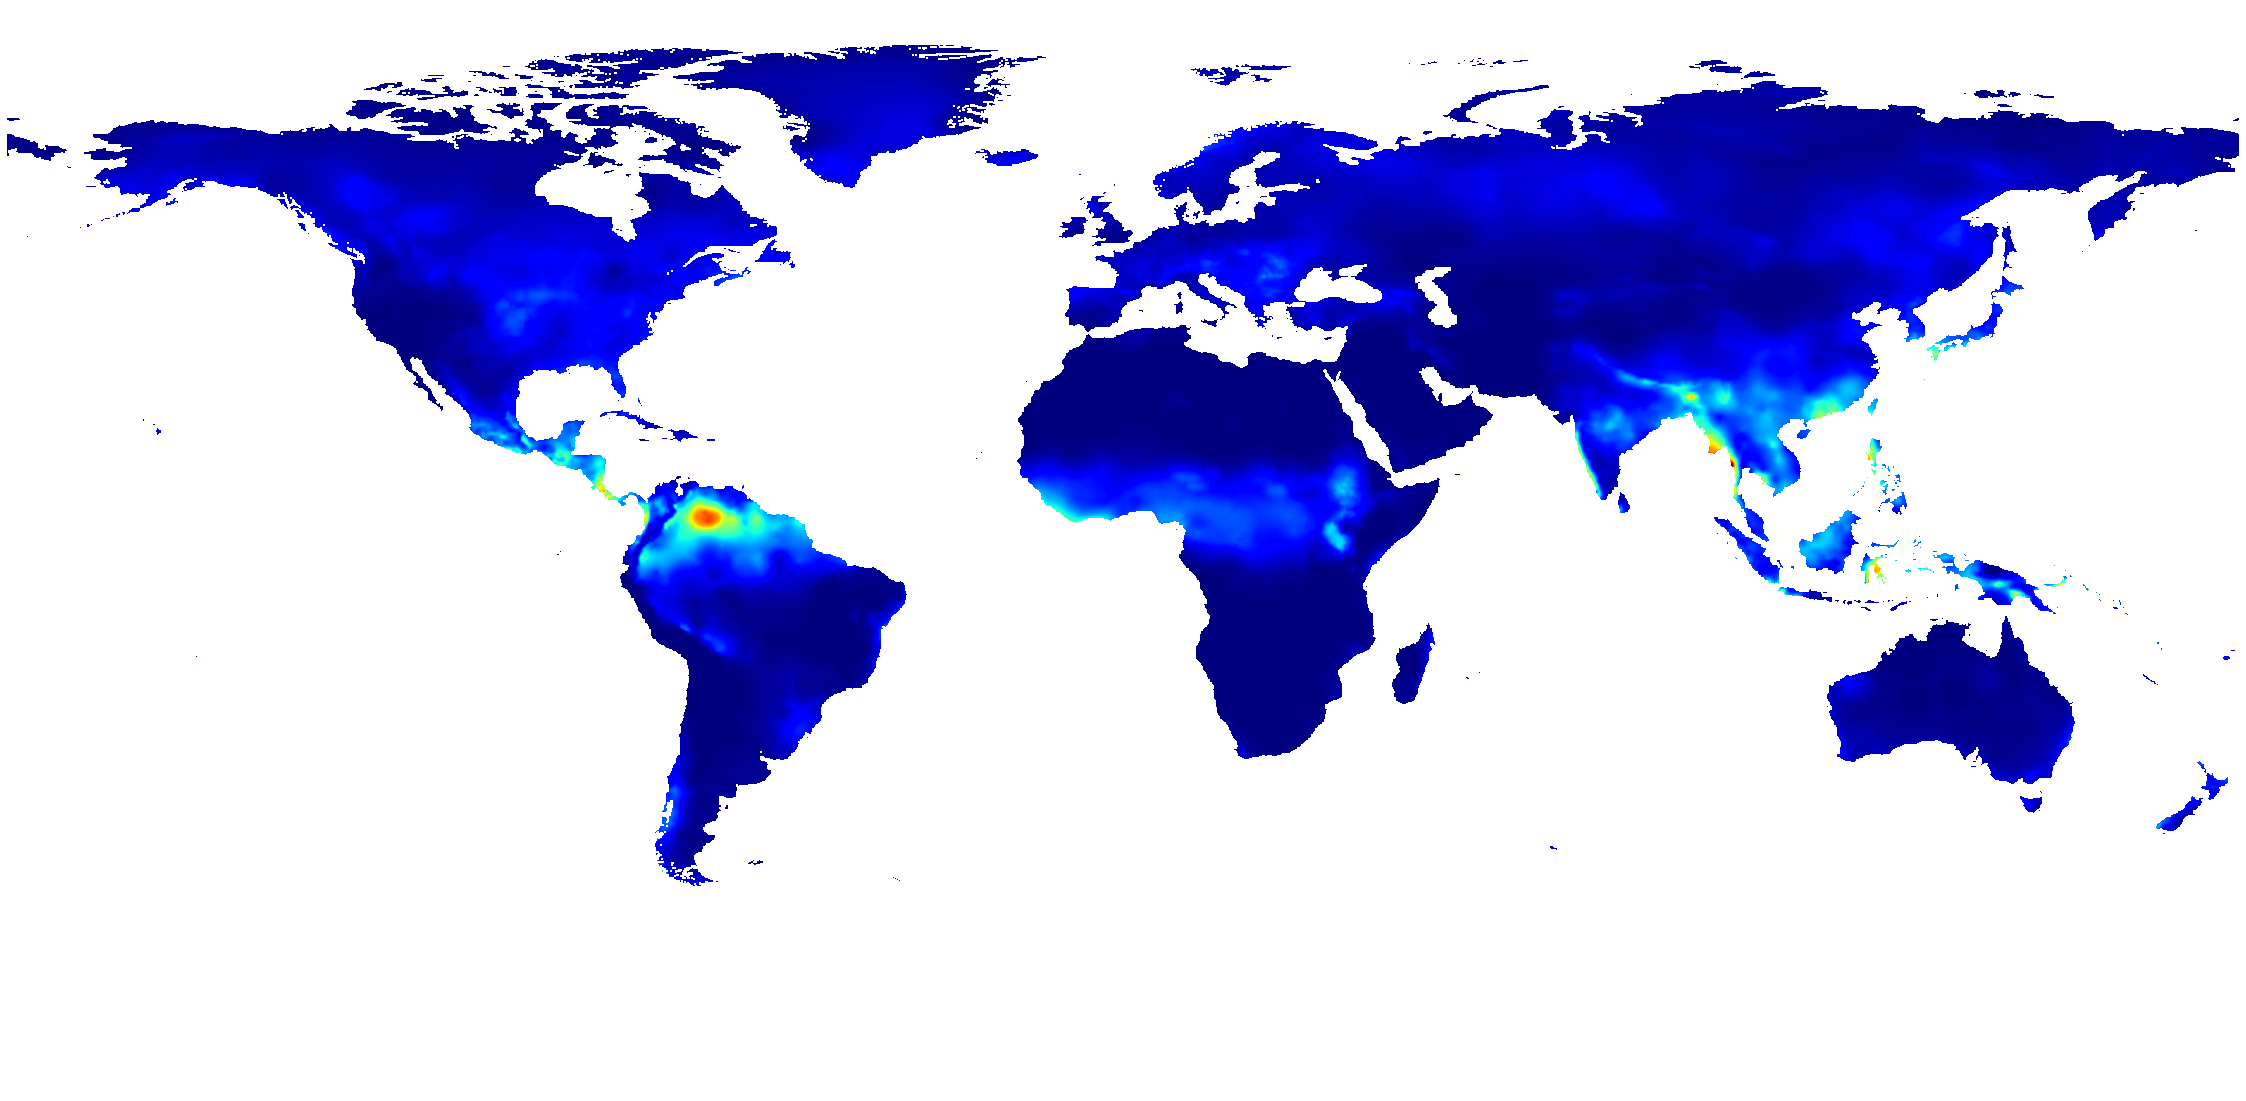

 75%|███████▌  | 3/4 [00:09<00:03,  3.49s/it]

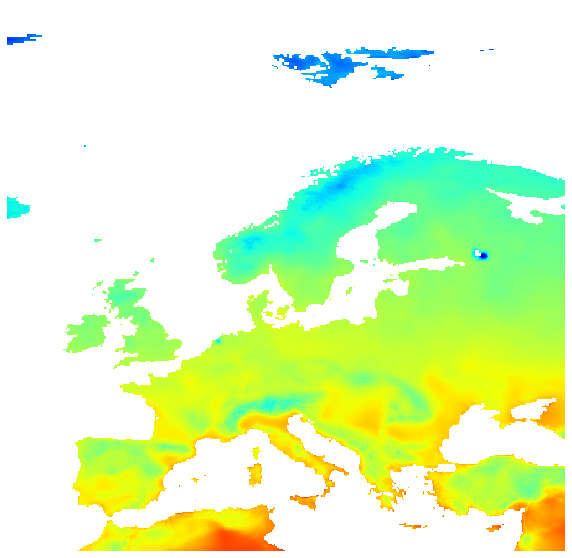

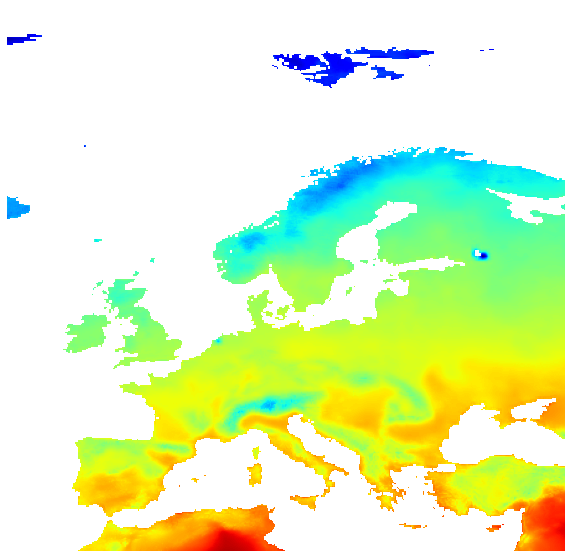

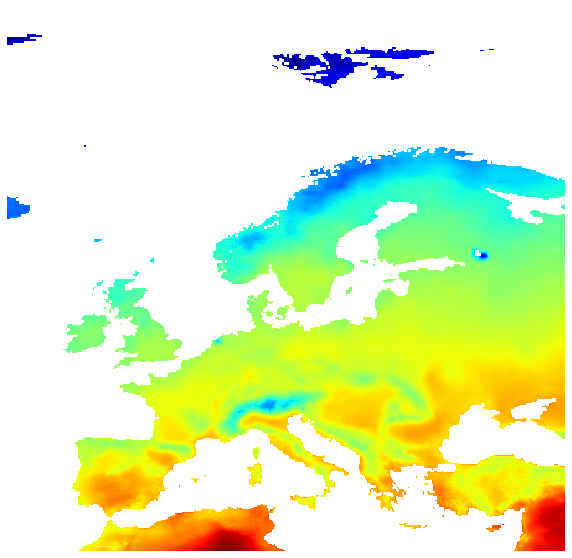

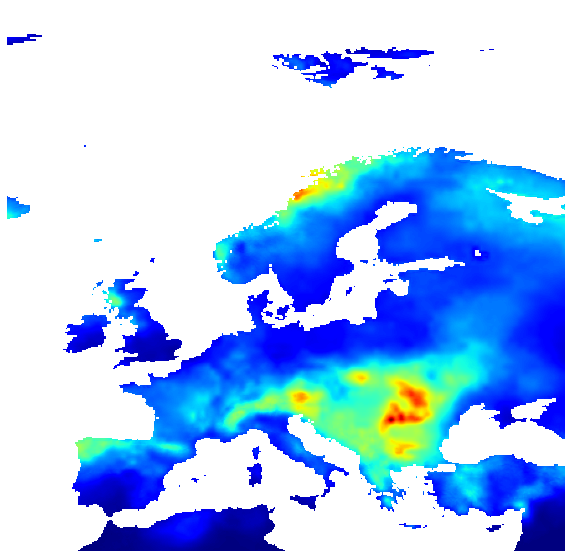

100%|██████████| 4/4 [00:10<00:00,  2.54s/it]


In [23]:
root_dir = "/media/xultaeculcis/2TB/datasets/cruts/"
original_cruts_file_pattern = os.path.join(
    root_dir, "pre-processed", "full-res", "{0}/cruts-{0}-2018-06-16.tif"
)
original_europe_extent_cruts_file_pattern = os.path.join(
    root_dir, "pre-processed", "europe-extent", "{0}/cruts-{0}-2018-06-16.tif"
)
inference_cruts_file_pattern = os.path.join(
    root_dir, "inference", "{0}/cruts-{0}-2018-06-16.tif"
)
inference_europe_extent_cruts_file_pattern = os.path.join(
    root_dir, "inference-europe-extent", "{0}/cruts-{0}-2018-06-16.tif"
)

patterns = [
    original_cruts_file_pattern,
    original_europe_extent_cruts_file_pattern,
    inference_cruts_file_pattern,
    inference_europe_extent_cruts_file_pattern,
]
out_paths = [
    "lr_original",
    "lr_original_europe_extent",
    "sr",
    "sr_europe_extent",
]

vflips = [
    True,
    True,
    False,
    False,
]

fig_sizes = [
    (40, 20),
    (10, 10),
    (40, 20),
    (10, 10),
]


def tifs_to_png(pattern, out_path, figsize, flip_ud=False):
    for var in ["tmn", "tmp", "tmx", "pre"]:
        img_path = pattern.format(var)
        fname = os.path.basename(img_path).replace("tif", "png")

        img = np.array(Image.open(img_path))
        if flip_ud:
            img = np.flipud(img)

        cmap = matplotlib.cm.jet.copy()
        cmap.set_bad("white", 1.0)
        plt.figure(figsize=figsize)
        plt.imshow(img, cmap=cmap, aspect="auto")
        plt.axis("off")

        out_dir = os.path.join("../app/assets/climate-sr/results", out_path)
        os.makedirs(out_dir, exist_ok=True)

        plt.savefig(os.path.join(out_dir, fname), bbox_inches="tight")
        plt.show()


for cuts_pattern, png_out_path, fig_size, vflip in tqdm(
    zip(patterns, out_paths, fig_sizes, vflips), total=len(patterns)
):
    tifs_to_png(cuts_pattern, png_out_path, fig_size, vflip)